<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Tinnitus_Dynamic_ML_Tunning_with_featSelect_SHAP_ROC_Version_521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2022.08.18_final.csv")

dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/Tinnitus_ALR&EEG_2022.08.18_final.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [4]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'01_AJW_30_02',Control,Test,101,147,214,263,366,105,149,...,0.000005,0.000064,0.1310,0.1700,0.396,0.303,0.764,2.32,0.332,0.775
1,'01_CGO_63_01',Control,Test,132,155,217,301,383,131,175,...,0.000001,0.000046,0.1990,0.1340,0.483,0.184,0.381,2.01,0.412,1.490
2,'01_KBJ_45_01',Control,Test,107,160,221,305,396,128,192,...,0.000144,0.000692,0.1130,0.3320,0.196,0.358,1.820,1.25,0.576,0.340
3,'02_KCH_26_02',Control,Test,77,200,233,268,379,166,120,...,0.000017,0.001010,0.0702,0.0288,0.308,0.593,1.930,9.10,0.228,2.440
4,'03_HMK_49_01',Control,Test,153,128,224,264,337,147,176,...,0.000002,0.000088,0.1290,0.0760,0.425,0.370,0.870,3.88,0.303,1.700


In [5]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [6]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [7]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

#Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [8]:
'''
list_of_feat=[]
norm_start=int(input("Normal Features Start Index:"))
norm_end=int(input("Normal Features End Index:"))
eeg_start=int(input("EEG Features Start Index:"))
eeg_end=int(input("EEG Features End Index:"))



list_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
'''

'\nlist_of_feat=[]\nnorm_start=int(input("Normal Features Start Index:"))\nnorm_end=int(input("Normal Features End Index:"))\neeg_start=int(input("EEG Features Start Index:"))\neeg_end=int(input("EEG Features End Index:"))\n\n\n\nlist_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])\n'

#Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [9]:
'''list_of_feat=[]
num=int(input("Input number of features: "))

for i in range(num):
  print(i+1,".")
  list_of_feat.append(input("Feature Name: "))'''


'list_of_feat=[]\nnum=int(input("Input number of features: "))\n\nfor i in range(num):\n  print(i+1,".")\n  list_of_feat.append(input("Feature Name: "))'

#Feature Selection (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [10]:
'''from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']'''


"from sklearn.feature_selection import SelectKBest\nbestfeatures_1 = SelectKBest(k=10)\nfit = bestfeatures_1.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']"

**Type-2**

In [11]:
'''
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectKBest,f_classif\nbestfeatures_2=SelectKBest(f_classif, k=10)\nfit = bestfeatures_f2fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

**Type-3**

In [12]:
'''
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectFpr, f_classif\n\nbestfeatures_3=SelectFpr(f_classif, alpha=0.1)\nfit = bestfeatures_3.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

<font color='blue' size=6><b>Input</b></font>

In [13]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [14]:
'''imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)'''

"imp=featureScores.nlargest(number_of_feat,'Score')\nprint(imp)"

In [15]:
'''
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])
  '''

'\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n  '

#Feature Selection (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [16]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [17]:
'''from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'''

'from sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X_, y_)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [18]:
list_of_feat=["Subjects",
              "p3_gap_peak_amp_20ms",
    "p3_gap_peak_amp_50ms",
    "p1_gap_peak_amp_20ms",
    "p1_gap_peak_amp_50ms",
    "gap_AUC_n1p2_R_20ms",
    "gap_AUC_n1p2_R_50ms",
    "n1p3_interval_nogap_20ms",
    "n1p3_interval_nogap_50ms",
    "n2_gap_peak_amp_20ms",
    "n2_gap_peak_amp_50ms",
    "p2n2_gap_nogap_diff_20ms",
    "p2n2_gap_nogap_diff_50ms",
    "gap_AUC_n1p2_L_20ms",
    "gap_AUC_n1p2_L_50ms",
    "gap_AUC_p1n1_R_20ms",
    "gap_AUC_p1n1_R_50ms",
    "gap_AUC_n1p2n2_20ms",
    "gap_AUC_n1p2n2_50ms",
    "n2_nogap_peak_ms_20ms",
    "n2_nogap_peak_ms_50ms",
    "n1p2_gap_no_gap_ratio_20ms",
    "n1p2_gap_no_gap_ratio_50ms",
    "PeakF_Theta_20ms",
    "PeakF_Theta_50ms",
    "SpectralEdge_Delta_20ms",
    "SpectralEdge_Delta_50ms",
    "RelativeAlpha_20ms",
    "RelativeAlpha_50ms",
    "DTABR_20ms",
    "DTABR_50ms"]

print(len(list_of_feat))

31


In [19]:
print(list_of_feat)

['Subjects', 'p3_gap_peak_amp_20ms', 'p3_gap_peak_amp_50ms', 'p1_gap_peak_amp_20ms', 'p1_gap_peak_amp_50ms', 'gap_AUC_n1p2_R_20ms', 'gap_AUC_n1p2_R_50ms', 'n1p3_interval_nogap_20ms', 'n1p3_interval_nogap_50ms', 'n2_gap_peak_amp_20ms', 'n2_gap_peak_amp_50ms', 'p2n2_gap_nogap_diff_20ms', 'p2n2_gap_nogap_diff_50ms', 'gap_AUC_n1p2_L_20ms', 'gap_AUC_n1p2_L_50ms', 'gap_AUC_p1n1_R_20ms', 'gap_AUC_p1n1_R_50ms', 'gap_AUC_n1p2n2_20ms', 'gap_AUC_n1p2n2_50ms', 'n2_nogap_peak_ms_20ms', 'n2_nogap_peak_ms_50ms', 'n1p2_gap_no_gap_ratio_20ms', 'n1p2_gap_no_gap_ratio_50ms', 'PeakF_Theta_20ms', 'PeakF_Theta_50ms', 'SpectralEdge_Delta_20ms', 'SpectralEdge_Delta_50ms', 'RelativeAlpha_20ms', 'RelativeAlpha_50ms', 'DTABR_20ms', 'DTABR_50ms']


In [20]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [21]:
X_new.shape

(165, 31)

In [22]:
y_new.shape

(165,)

In [23]:
from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [24]:
X_train_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n1p2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
83,'66_MGH_52_01_8k',6.369437,8.721146,5.154610,5.157011,0.140955,0.074164,3.018063,5.028641,6.478930,...,-376.959710,-407.713264,4.280156,5.836578,4.669260,5.058368,0.0870,0.2090,6.28,0.770
24,'13_LHM_34_01',5.313777,3.421726,3.909864,3.416225,0.326956,0.075592,3.717316,0.496188,6.138024,...,-184.589226,-178.082858,4.669260,4.280156,5.447472,4.280156,0.1180,0.0798,4.81,8.040
151,'54_LJB_26_01_8k',6.818168,6.948500,4.461776,5.049820,0.103086,0.225523,3.144253,3.751045,6.212740,...,-314.435521,-380.100403,5.447474,5.058368,5.447474,5.447474,0.1760,0.1770,1.71,1.410
86,'69_KTS_55_01_4k',9.959457,7.986769,7.732897,8.755311,0.108667,0.052905,6.636849,1.764162,12.718418,...,-470.828277,-476.312973,4.669262,5.836578,4.669262,6.225684,0.1400,0.2650,2.47,0.849
19,'10_NYS_31_01',3.679091,12.115925,6.024409,4.932742,0.020748,0.152818,1.858586,8.339286,5.588047,...,-291.858237,-701.209089,3.891050,3.501946,3.891050,3.891050,0.0765,0.0566,7.30,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,'05_AEY_41_01',6.698255,7.821621,7.407543,3.597972,0.085148,0.149940,5.122363,3.545268,9.739846,...,-485.077235,-326.713195,5.058366,6.225680,5.447472,4.280156,0.1020,0.0916,3.32,3.830
103,'09_JCM_38_01',6.588320,10.748294,6.245175,6.641600,0.210697,0.177959,3.991611,5.808225,7.224071,...,-539.684933,-383.659062,5.447472,3.891050,4.280156,4.669262,0.0705,0.0989,5.56,5.300
67,'44_KMR_59_01_4k',7.643207,5.605295,5.793006,6.892800,0.133200,0.135500,4.579751,3.219950,8.200628,...,-350.151544,-402.348638,3.501946,3.501946,3.891050,3.891050,0.0826,0.0733,7.00,8.350
117,'18_AHJ_26_01',20.121744,22.040771,12.415887,12.801121,0.220593,0.220316,11.059690,10.954581,19.263015,...,-844.708088,-565.427676,4.280156,3.501946,4.669262,4.280156,0.1440,0.1310,2.49,4.250


In [25]:
X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

In [26]:
result={}



---





---



#ADABOOST

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train.iloc[:,1:], y_train)
y_pred = ada_defult.predict(X_test.iloc[:,1:])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 9  6]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.62      0.56      0.59        18

    accuracy                           0.58        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.58      0.58      0.58        33

Accurecy:  0.5757575757575758


In [28]:
prediction = ada_defult.predict(X_test[0:2].iloc[:,1:])

In [29]:
print(prediction)
print(X_test[0:2])

[1 1]
    p3_gap_peak_amp_20ms  p3_gap_peak_amp_50ms  p1_gap_peak_amp_20ms  \
45             12.298735              9.436987              9.109948   
51              9.122776              9.531450              5.825824   

    p1_gap_peak_amp_50ms  gap_AUC_n1p2_R_20ms  gap_AUC_n1p2_R_50ms  \
45              7.946421             0.120714             0.090179   
51              5.789255             0.277219             0.301900   

    n1p3_interval_nogap_20ms  n1p3_interval_nogap_50ms  n2_gap_peak_amp_20ms  \
45                  7.112375                  4.826144             13.367969   
51                  4.585858                  6.904603              9.705150   

    n2_gap_peak_amp_50ms  ...  n1p2_gap_no_gap_ratio_20ms  \
45             10.306141  ...                 -526.949638   
51              9.997814  ...                 -648.977491   

    n1p2_gap_no_gap_ratio_50ms  PeakF_Theta_20ms  PeakF_Theta_50ms  \
45                 -506.905636          6.225682          5.058368   
5

1/200 round completed......................... Accurecy: 0.6666666666666666
2/200 round completed......................... Accurecy: 0.696969696969697
3/200 round completed......................... Accurecy: 0.6060606060606061
4/200 round completed......................... Accurecy: 0.5757575757575758
5/200 round completed......................... Accurecy: 0.5454545454545454
6/200 round completed......................... Accurecy: 0.6060606060606061
7/200 round completed......................... Accurecy: 0.6060606060606061
8/200 round completed......................... Accurecy: 0.6060606060606061
9/200 round completed......................... Accurecy: 0.5454545454545454
10/200 round completed......................... Accurecy: 0.5757575757575758
11/200 round completed......................... Accurecy: 0.5757575757575758
12/200 round completed......................... Accurecy: 0.5454545454545454
13/200 round completed......................... Accurecy: 0.5454545454545454
14/200 ro

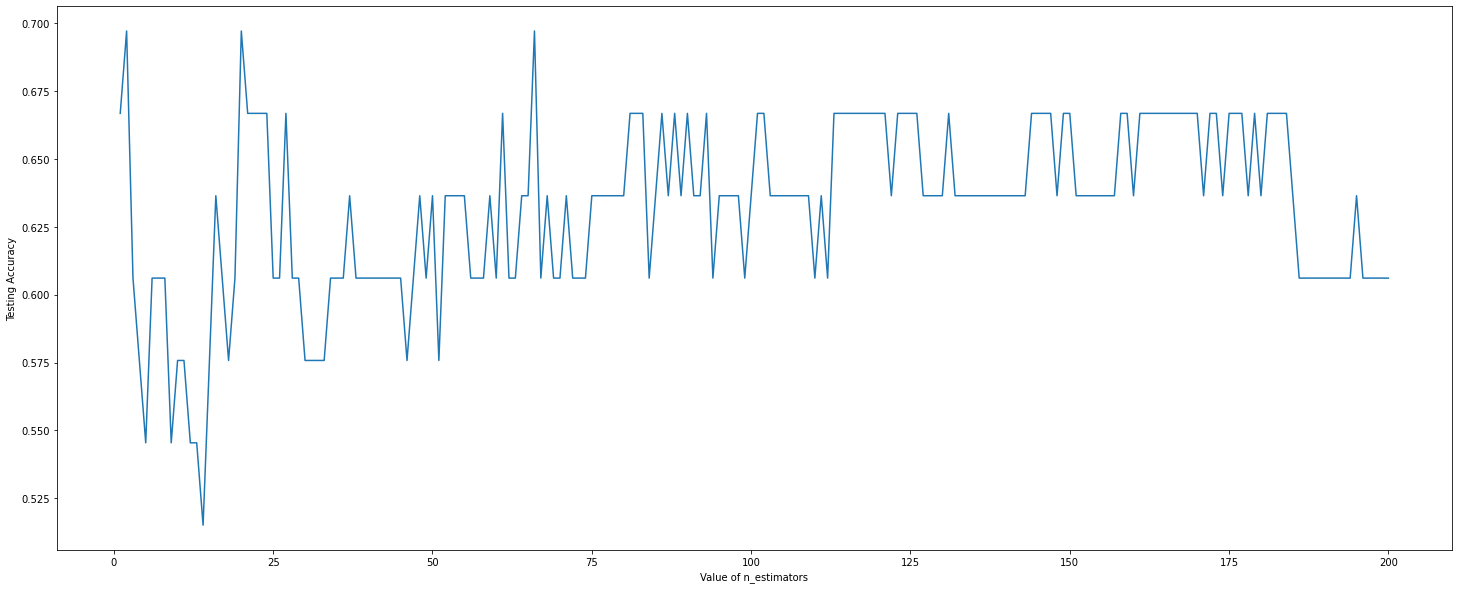

In [30]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 9  6]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.70      0.78      0.74        18

    accuracy                           0.70        33
   macro avg       0.70      0.69      0.69        33
weighted avg       0.70      0.70      0.69        33

Accurecy:  0.696969696969697




---



---



#Graddient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[11  4]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.71      0.56      0.63        18

    accuracy                           0.64        33
   macro avg       0.65      0.64      0.64        33
weighted avg       0.65      0.64      0.64        33

Accurecy:  0.6363636363636364


1/150 round completed......................... Accurecy: 0.6363636363636364
2/150 round completed......................... Accurecy: 0.5757575757575758
3/150 round completed......................... Accurecy: 0.5454545454545454
4/150 round completed......................... Accurecy: 0.5757575757575758
5/150 round completed......................... Accurecy: 0.5757575757575758
6/150 round completed......................... Accurecy: 0.6060606060606061
7/150 round completed......................... Accurecy: 0.6363636363636364
8/150 round completed......................... Accurecy: 0.6666666666666666
9/150 round completed......................... Accurecy: 0.6363636363636364
10/150 round completed......................... Accurecy: 0.6363636363636364
11/150 round completed......................... Accurecy: 0.6060606060606061
12/150 round completed......................... Accurecy: 0.6060606060606061
13/150 round completed......................... Accurecy: 0.6060606060606061
14/150 r

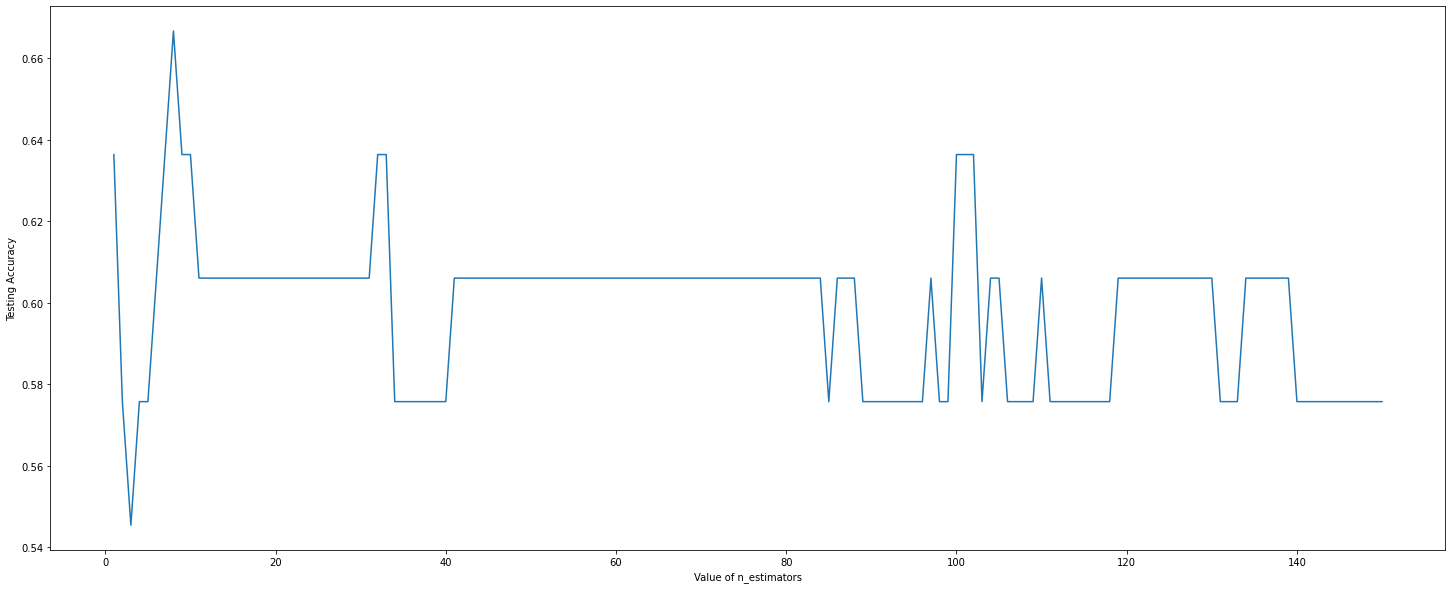

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.6060606060606061
2/30 round completed......................... Accurecy: 0.5454545454545454
3/30 round completed......................... Accurecy: 0.6363636363636364
4/30 round completed......................... Accurecy: 0.6060606060606061
5/30 round completed......................... Accurecy: 0.6060606060606061
6/30 round completed......................... Accurecy: 0.5151515151515151
7/30 round completed......................... Accurecy: 0.5454545454545454
8/30 round completed......................... Accurecy: 0.5151515151515151
9/30 round completed......................... Accurecy: 0.5151515151515151
10/30 round completed......................... Accurecy: 0.5151515151515151
11/30 round completed......................... Accurecy: 0.5151515151515151
12/30 round completed......................... Accurecy: 0.5151515151515151
13/30 round completed......................... Accurecy: 0.5151515151515151
14/30 round completed

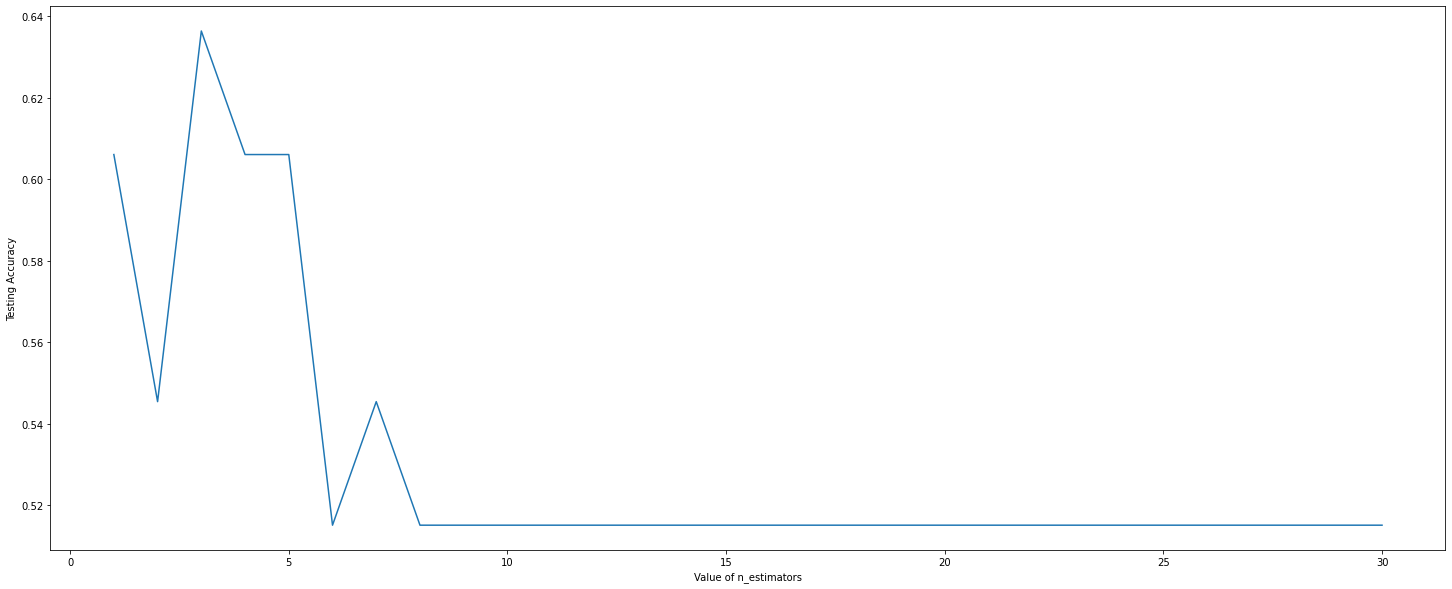

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.77      0.56      0.65        18

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.69      0.67      0.66        33

Accurecy:  0.6666666666666666


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[11  4]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.71      0.56      0.63        18

    accuracy                           0.64        33
   macro avg       0.65      0.64      0.64        33
weighted avg       0.65      0.64      0.64        33

Accurecy:  0.6363636363636364


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.77      0.56      0.65        18

    accuracy                           0.67        33
   macro avg       0.68      0.68      0.67        33
weighted avg       0.69      0.67      0.66        33

Accurecy:  0.6666666666666666




---



---



#Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.79      0.61      0.69        18

    accuracy                           0.70        33
   macro avg       0.71      0.71      0.70        33
weighted avg       0.72      0.70      0.70        33

Accurecy:  0.696969696969697


1/150 round completed......................... Accurecy: 0.7878787878787878
2/150 round completed......................... Accurecy: 0.696969696969697
3/150 round completed......................... Accurecy: 0.6363636363636364
4/150 round completed......................... Accurecy: 0.6060606060606061
5/150 round completed......................... Accurecy: 0.6363636363636364
6/150 round completed......................... Accurecy: 0.6060606060606061
7/150 round completed......................... Accurecy: 0.6060606060606061
8/150 round completed......................... Accurecy: 0.6060606060606061
9/150 round completed......................... Accurecy: 0.6666666666666666
10/150 round completed......................... Accurecy: 0.6666666666666666
11/150 round completed......................... Accurecy: 0.696969696969697
12/150 round completed......................... Accurecy: 0.6666666666666666
13/150 round completed......................... Accurecy: 0.696969696969697
14/150 roun

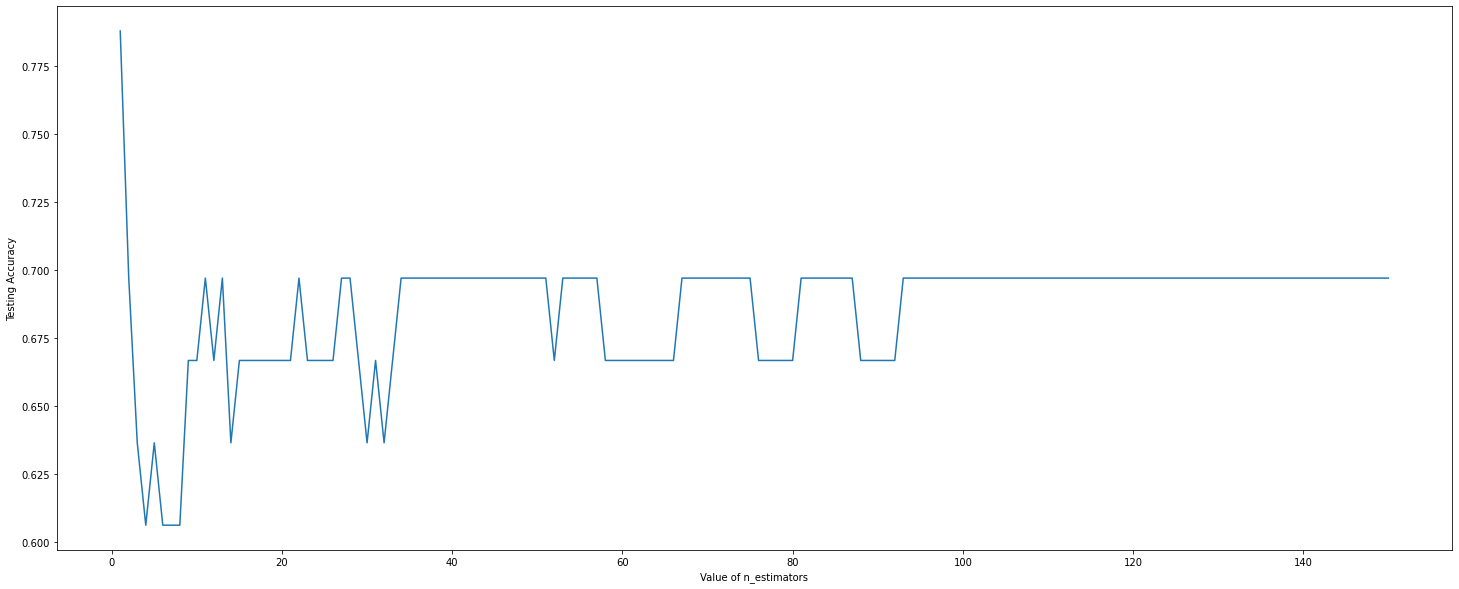

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.6666666666666666
2/150 round completed......................... Accurecy: 0.6666666666666666
3/150 round completed......................... Accurecy: 0.696969696969697
4/150 round completed......................... Accurecy: 0.6666666666666666
5/150 round completed......................... Accurecy: 0.6666666666666666
6/150 round completed......................... Accurecy: 0.6666666666666666
7/150 round completed......................... Accurecy: 0.696969696969697
8/150 round completed......................... Accurecy: 0.696969696969697
9/150 round completed......................... Accurecy: 0.696969696969697
10/150 round completed......................... Accurecy: 0.696969696969697
11/150 round completed......................... Accurecy: 0.696969696969697
12/150 round completed......................... Accurecy: 0.696969696969697
13/150 round completed......................... Accurecy: 0.696969696969697
14/150 round com

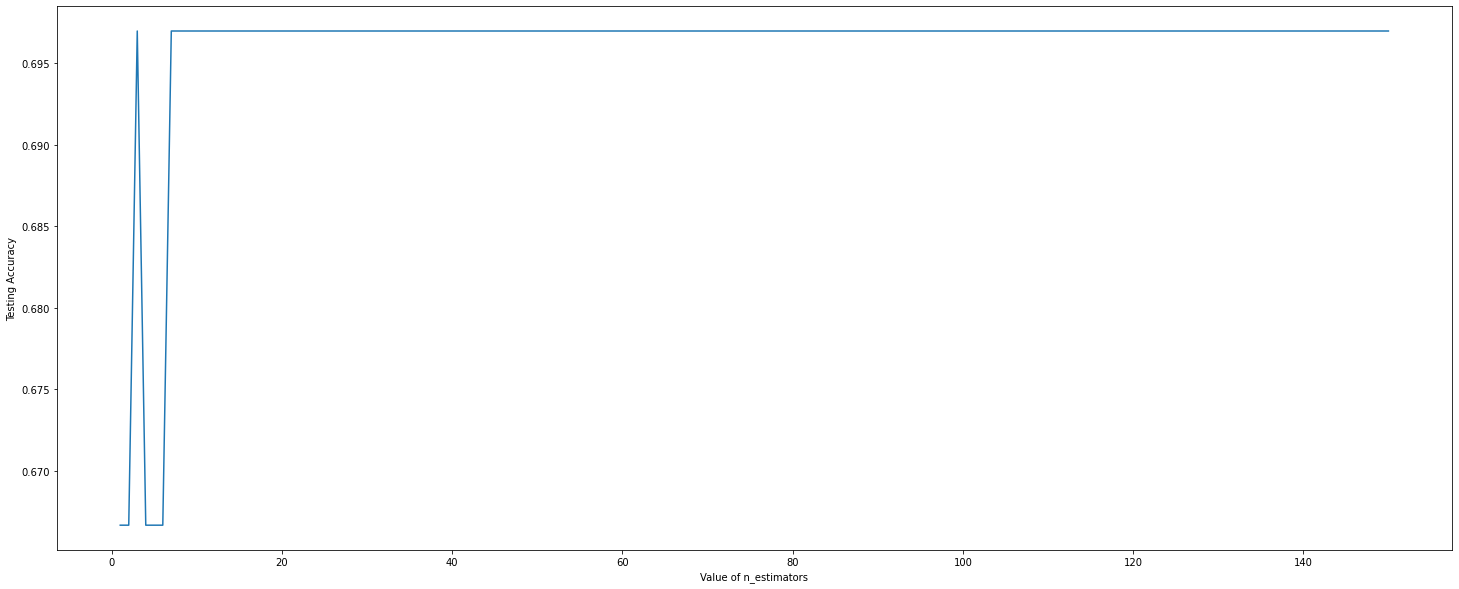

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.82      0.78      0.80        18

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.79      0.79      0.79        33

Accurecy:  0.7878787878787878


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.79      0.61      0.69        18

    accuracy                           0.70        33
   macro avg       0.71      0.71      0.70        33
weighted avg       0.72      0.70      0.70        33

Accurecy:  0.696969696969697


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  2]
 [13  5]]
              precision    recall  f1-score   support

           0       0.50      0.87      0.63        15
           1       0.71      0.28      0.40        18

    accuracy                           0.55        33
   macro avg       0.61      0.57      0.52        33
weighted avg       0.62      0.55      0.51        33

Accurecy:  0.5454545454545454




---



---



#XGB

In [44]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[10  5]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.67      0.56      0.61        18

    accuracy                           0.61        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.62      0.61      0.61        33

Accurecy:  0.6060606060606061


1/250 round completed......................... Accurecy: 0.5757575757575758
2/250 round completed......................... Accurecy: 0.5757575757575758
3/250 round completed......................... Accurecy: 0.5757575757575758
4/250 round completed......................... Accurecy: 0.5757575757575758
5/250 round completed......................... Accurecy: 0.5757575757575758
6/250 round completed......................... Accurecy: 0.6363636363636364
7/250 round completed......................... Accurecy: 0.6060606060606061
8/250 round completed......................... Accurecy: 0.6060606060606061
9/250 round completed......................... Accurecy: 0.6363636363636364
10/250 round completed......................... Accurecy: 0.6060606060606061
11/250 round completed......................... Accurecy: 0.6060606060606061
12/250 round completed......................... Accurecy: 0.6060606060606061
13/250 round completed......................... Accurecy: 0.6060606060606061
14/250 r

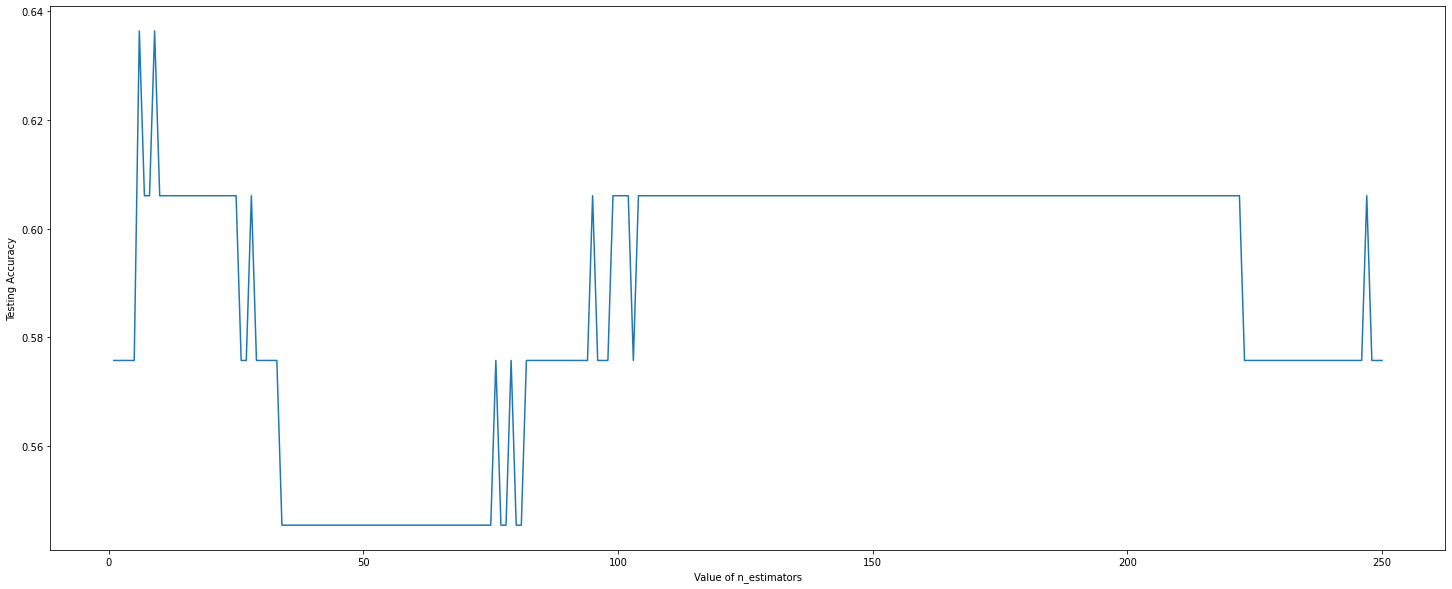

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.6060606060606061
2/250 round completed......................... Accurecy: 0.5757575757575758
3/250 round completed......................... Accurecy: 0.6060606060606061
4/250 round completed......................... Accurecy: 0.5757575757575758
5/250 round completed......................... Accurecy: 0.6060606060606061
6/250 round completed......................... Accurecy: 0.6060606060606061
7/250 round completed......................... Accurecy: 0.6363636363636364
8/250 round completed......................... Accurecy: 0.6363636363636364
9/250 round completed......................... Accurecy: 0.6363636363636364
10/250 round completed......................... Accurecy: 0.6363636363636364
11/250 round completed......................... Accurecy: 0.6363636363636364
12/250 round completed......................... Accurecy: 0.6363636363636364
13/250 round completed......................... Accurecy: 0.6363636363636364
14/250 r

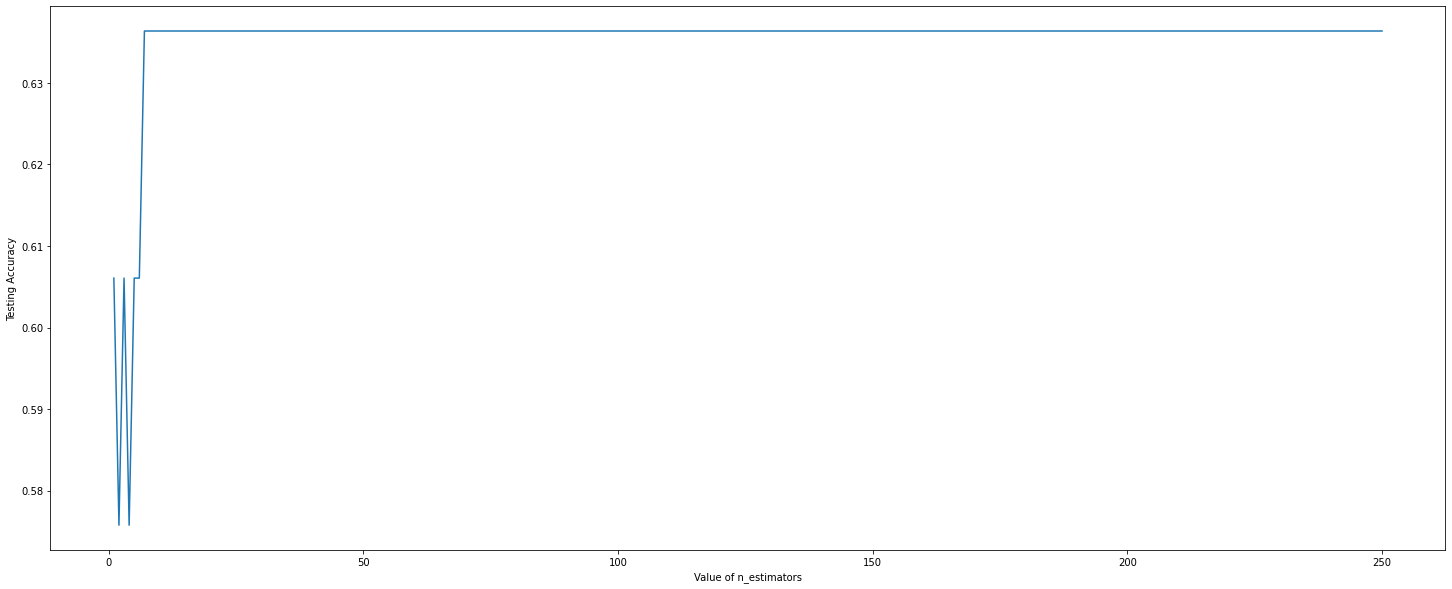

In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [47]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[12  3]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.75      0.50      0.60        18

    accuracy                           0.64        33
   macro avg       0.66      0.65      0.63        33
weighted avg       0.67      0.64      0.63        33

Accurecy:  0.6363636363636364
XGBClassifier(max_depth=7)


In [48]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[12  3]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.75      0.50      0.60        18

    accuracy                           0.64        33
   macro avg       0.66      0.65      0.63        33
weighted avg       0.67      0.64      0.63        33

Accurecy:  0.6363636363636364
XGBClassifier(n_estimators=6)


In [49]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  3]
 [11  7]]
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.70      0.39      0.50        18

    accuracy                           0.58        33
   macro avg       0.61      0.59      0.57        33
weighted avg       0.62      0.58      0.56        33

Accurecy:  0.5757575757575758


#KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 9  6]
 [11  7]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.51        15
           1       0.54      0.39      0.45        18

    accuracy                           0.48        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.50      0.48      0.48        33

Accurecy:  0.48484848484848486


1/130 round completed......................... Accurecy: 0.48484848484848486
2/130 round completed......................... Accurecy: 0.3939393939393939
3/130 round completed......................... Accurecy: 0.45454545454545453
4/130 round completed......................... Accurecy: 0.42424242424242425
5/130 round completed......................... Accurecy: 0.48484848484848486
6/130 round completed......................... Accurecy: 0.3939393939393939
7/130 round completed......................... Accurecy: 0.3939393939393939
8/130 round completed......................... Accurecy: 0.42424242424242425
9/130 round completed......................... Accurecy: 0.45454545454545453
10/130 round completed......................... Accurecy: 0.48484848484848486
11/130 round completed......................... Accurecy: 0.42424242424242425
12/130 round completed......................... Accurecy: 0.3939393939393939
13/130 round completed......................... Accurecy: 0.42424242424242425

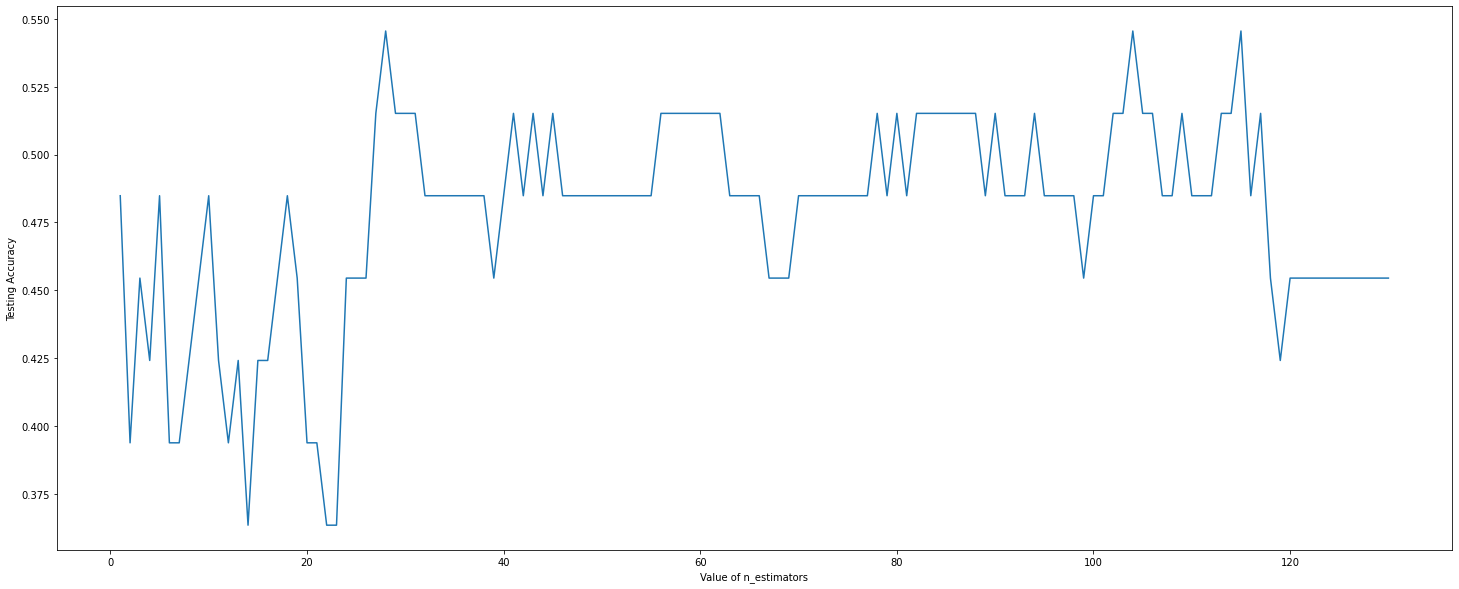

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=130
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[10  5]
 [10  8]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.62      0.44      0.52        18

    accuracy                           0.55        33
   macro avg       0.56      0.56      0.54        33
weighted avg       0.56      0.55      0.54        33

Accurecy:  0.5454545454545454


#NB

In [53]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[12  3]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.79      0.61      0.69        18

    accuracy                           0.70        33
   macro avg       0.71      0.71      0.70        33
weighted avg       0.72      0.70      0.70        33

Accurecy:  0.696969696969697




---



---



#Result

In [54]:
for i in result:
  print(i[0]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0)  :  0.5757575757575758
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=2, random_state=0)  :  0.696969696969697
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0)  :  0.6363636363636364
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=8, random_state=0)  :  0.6666666666666666
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0)  :  0.6363636363636364
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=8, random_state=0)  :  0.6666666666666666
---------------------------------------------------------------

RandomForestClassifier(random_state=0)  :  0.696969696969697
---------------------------------------------------------------

RandomForestClassifier(n_estimators=1, random_state=0)  :

In [55]:
best_models=[]
sorted_values = sorted(result.values(),reverse=True) 
sorted_result = {}

for i in sorted_values:
    for k in result.keys():
        if result[k] == i:
            sorted_result[k] = result[k]
            break



flage=[]
it=0

print("Best Models and Accuracy")
for i in sorted_result:
  if it==4:
    break
  if i[1] not in flage:
    print("---------------")
    best_models.append((i[0],i[2]))
    print(i[0]," : ",sorted_result[i])
    y_pred = i[0].predict(X_test)

    flage.append(i[1])
    it+=1

Best Models and Accuracy
---------------
RandomForestClassifier(n_estimators=1, random_state=0)  :  0.7878787878787878
---------------
AdaBoostClassifier(n_estimators=2, random_state=0)  :  0.696969696969697
---------------
GradientBoostingClassifier(n_estimators=8, random_state=0)  :  0.6666666666666666
---------------
XGBClassifier()  :  0.6060606060606061


In [56]:
len(best_models)

4

#ROC

**ROC AUC Testing**

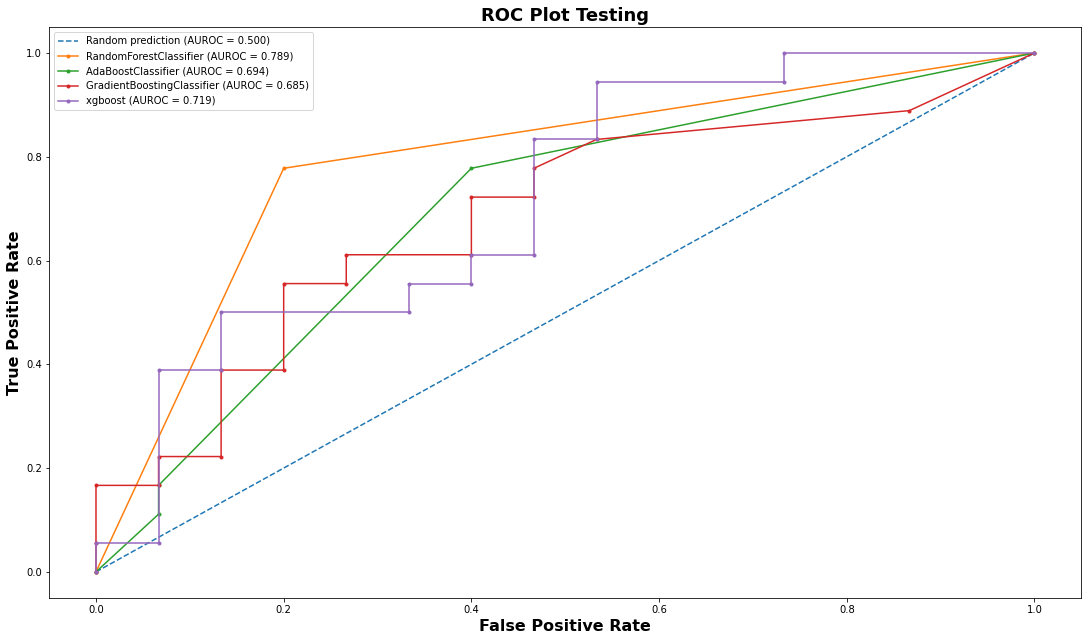

In [57]:

r_probs = [0 for _ in range(len(y_test))]
model1_probs = best_models[0][0].predict_proba(X_test)
model2_probs = best_models[1][0].predict_proba(X_test)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_test)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_test)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
model1_auc = roc_auc_score(y_test, model1_probs)
model2_auc = roc_auc_score(y_test, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_test, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_test, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_test, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_test, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_test, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_test, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Testing',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Testing.png', dpi=100)
plt.show()

**ROC-AUC For Training Phase**

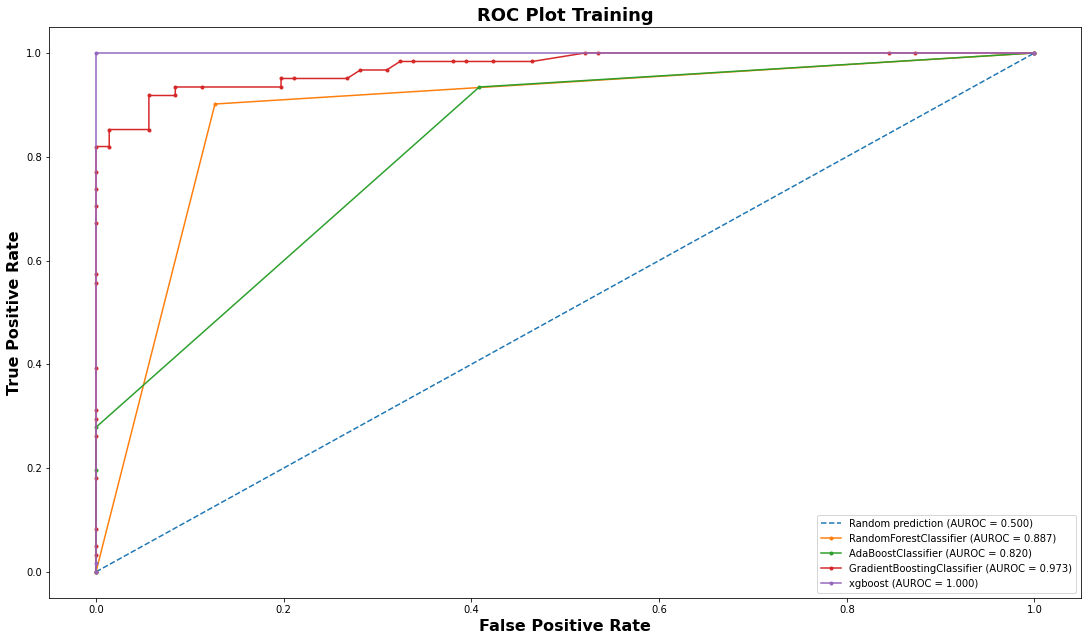

In [58]:

r_probs = [0 for _ in range(len(y_train))]
model1_probs = best_models[0][0].predict_proba(X_train)
model2_probs = best_models[1][0].predict_proba(X_train)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_train)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_train)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_train, r_probs)
model1_auc = roc_auc_score(y_train, model1_probs)
model2_auc = roc_auc_score(y_train, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_train, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_train, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_train, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_train, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_train, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_train, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_train, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Training',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Training.png', dpi=100)
plt.show()

Testing: Why XG Boost Has Good Graph?

In [62]:
y_pred=best_models[3][0].predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[10  5]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.67      0.56      0.61        18

    accuracy                           0.61        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.62      0.61      0.61        33

Accurecy:  0.6060606060606061


#SHAP

In [ ]:
!pip install shap
import shap

#SHAP MODEL 1

In [ ]:
print("Models: ",best_models[0][1])

explainer = shap.Explainer(best_models[0][0].predict, X_test)

shap_values1 = explainer(X_test)
features_names=list_of_feat

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1,max_display=20)

In [ ]:
print("Models: ",best_models[0][0])
shap.summary_plot(shap_values1,max_display=20,feature_names=features_names)

**Local Explanation** <br>
You can change the index of <i>shap_values1[index]</i> to accure the desired output. 

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.waterfall(shap_values1[2],max_display=20)

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1[2],max_display=20)

#SHAP MODEL2

In [ ]:
print("Models: ",best_models[1][0])

explainer = shap.Explainer(best_models[1][0].predict, X_test)

shap_values2 = explainer(X_test)
features_names=list_of_feat

**Global Explanation**

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2,max_display=20)

In [ ]:
print("Models: ",best_models[1][0])
shap.summary_plot(shap_values2,max_display=20,feature_names=features_names)

**Local Explanation**

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.waterfall(shap_values2[2],max_display=20)

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2[2],max_display=20)

#SHAP MODEL 3

In [ ]:
print("Models: ",best_models[2][0])

explainer = shap.Explainer(best_models[2][0].predict, X_test)

shap_values3 = explainer( X_test)
features_names=list_of_feat

**Global**

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3,max_display=20)

In [ ]:
print("Models: ",best_models[2][0])
shap.summary_plot(shap_values3,max_display=20,feature_names=features_names)

**LOCAL**

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.waterfall(shap_values3[2],max_display=20)

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3[2],max_display=20)

#Confusion Matrix

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(best_models[0][0], classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
cm2 = ConfusionMatrix(best_models[1][0], classes=classes)

cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

In [ ]:


cm3 = ConfusionMatrix(best_models[2][0], classes=classes)

cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
for i in range(len(best_models)):
  temp=X_test_with_subject

  prediction_cls = reverse_transfrom(list(best_models[i][0].predict(X_test[0:])))
  actual_cls = reverse_transfrom(list(y_test[0:]))

  temp["Actual"] = actual_cls
  temp["Predicted"] = prediction_cls

  temp.to_csv(best_models[i][1]+".csv")